### Importing All Required Libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import pydotplus

import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn import preprocessing


#Supress the warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Importing the Dataset

In [2]:
df=pd.read_csv('BostonHousingData.csv')
df.head()

,Sr. No.,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
data=df.drop('Sr. No.',axis=1)
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Data Description 

In [5]:
data.info()
#we have all data in integers form

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


#### Stat Description

In [6]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Exploratory Data Analysis

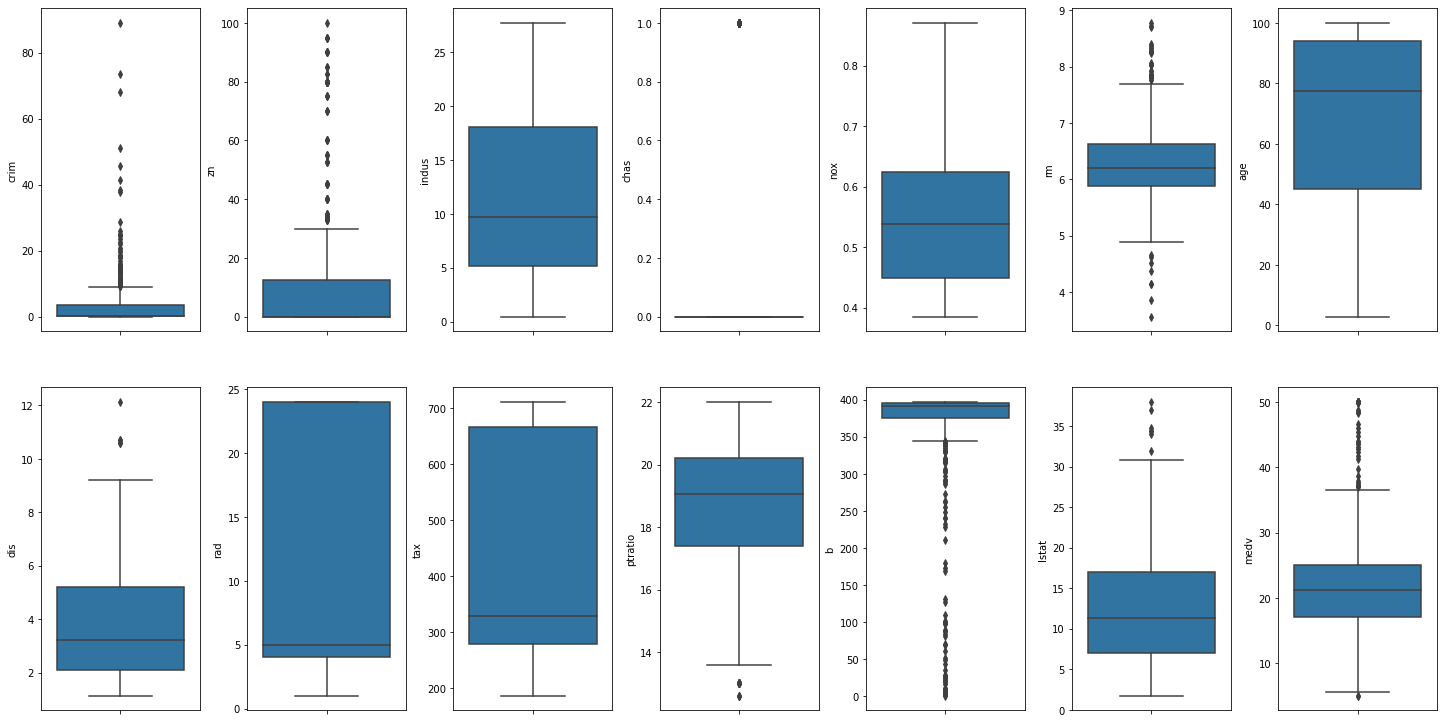

In [6]:
# defining a loop to check outliers using boxpots in every data columns.
#creat box plot
fig,ax=plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index=0
ax=ax.flatten()

for col,value in data.items():
    sns.boxplot(y=col,data=data,ax=ax[index])
    index+=1
#from result we can see so many outliers and overlapping from the box plots of various features so we will do some hyperparameter tunning to visualize it correctly
#as follows

plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

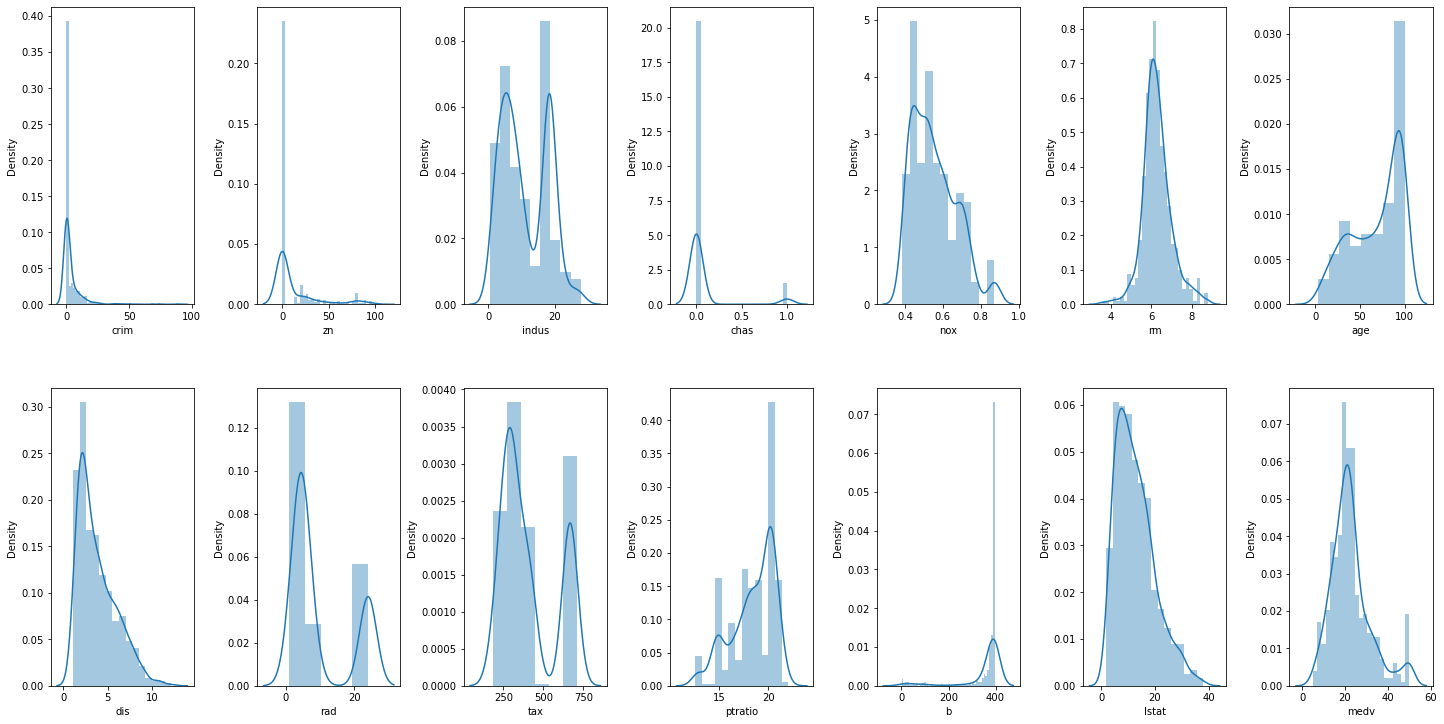

In [7]:
#creat hist plot
fig,ax=plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index=0
ax=ax.flatten()

for col,value in data.items():
    sns.distplot(value,ax=ax[index])
    index+=1
#from result we can see overlapping from the box plots of various features so we will do some hyperparameter tunning to visualize it correctly
#as follows

plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

### Min-Max Normalization

In [8]:
cols=['crim','zn','tax','b']
for col in cols:
    #find minimum and maximum of that column 
    minimum=min(data[col])
    maximum=max(data[col])
    data[col]=(data[col]-minimum)/(maximum-minimum)

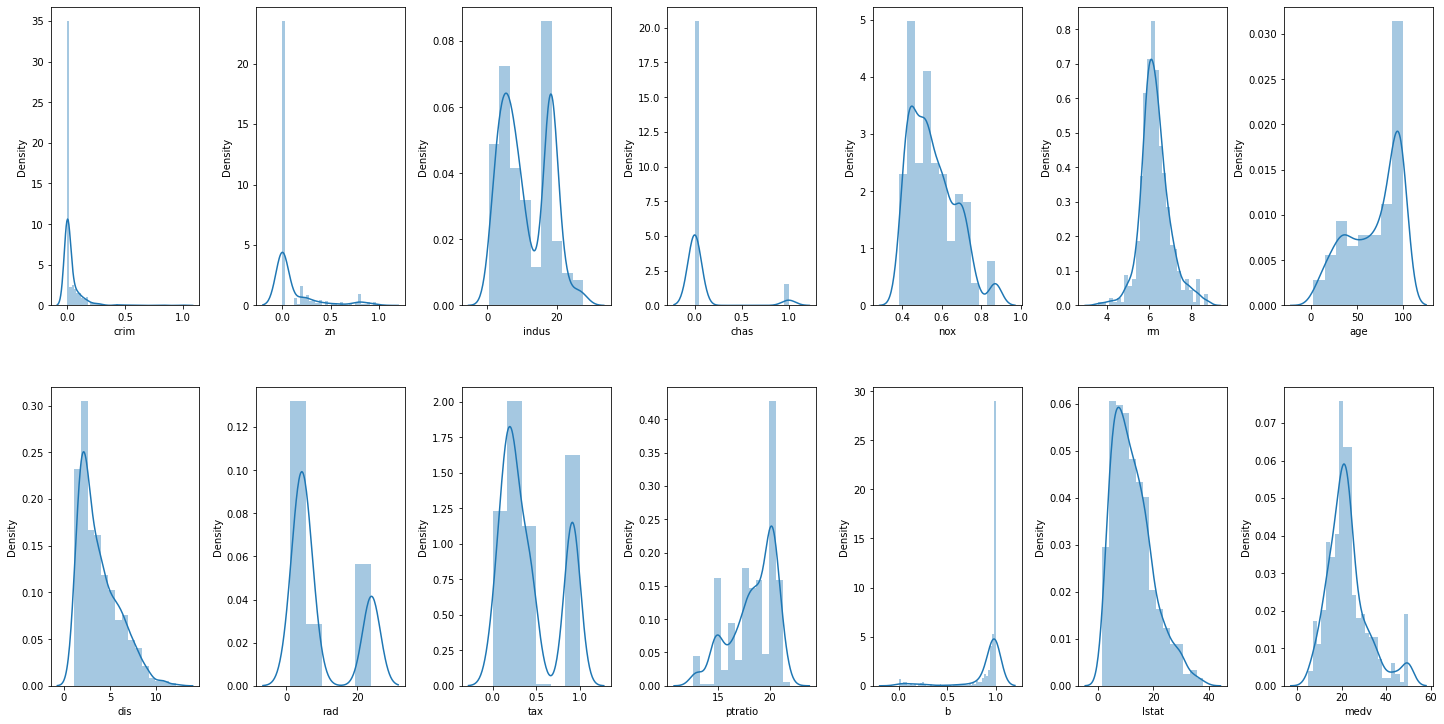

In [9]:
#creat hist plot
fig,ax=plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index=0
ax=ax.flatten()

for col,value in data.items():
    sns.distplot(value,ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

### Standandization 

In [10]:
from sklearn import preprocessing
scaler=preprocessing.StandardScaler()
#fit our data
scaled_cols=scaler.fit_transform(data[cols])
scaled_cols=pd.DataFrame(scaled_cols,columns=cols)
scaled_cols.head()

,crim,zn,tax,b
0,-0.419782,0.284830,-0.666608,0.441052
1,-0.417339,-0.487722,-0.987329,0.441052
2,-0.417342,-0.487722,-0.987329,0.396427
3,-0.416750,-0.487722,-1.106115,0.416163
4,-0.412482,-0.487722,-1.106115,0.441052


In [11]:
for col in cols:
    data[col]=scaled_cols[col]

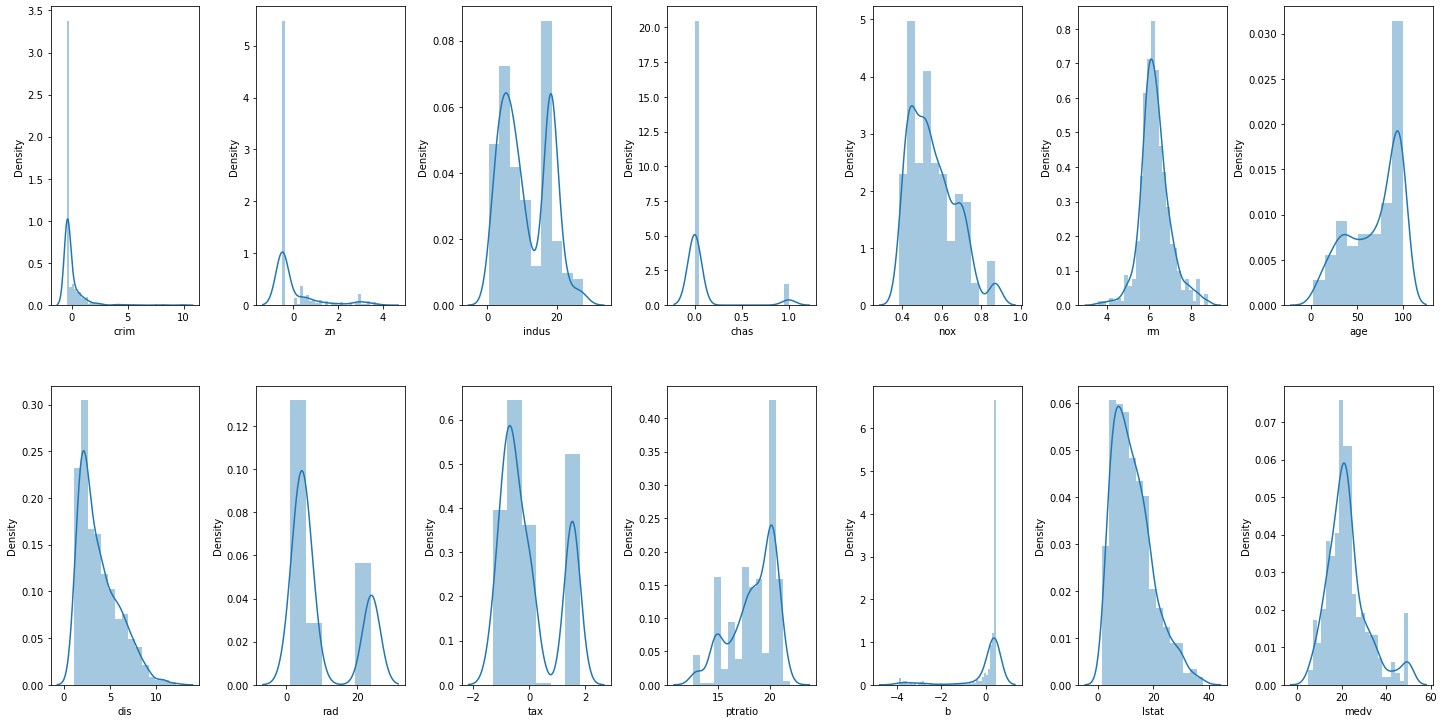

In [12]:
fig,ax=plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index=0
ax=ax.flatten()
for col,value in data.items():
    sns.distplot(value,ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

### Missing Value Analysis if any

In [13]:
data.isnull().sum()
#we can see there are no any missing values

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

# Feature Selection Bivariate Analysis

##### Lets Check Correlation between predictors and target variable i.e medv

<AxesSubplot:>

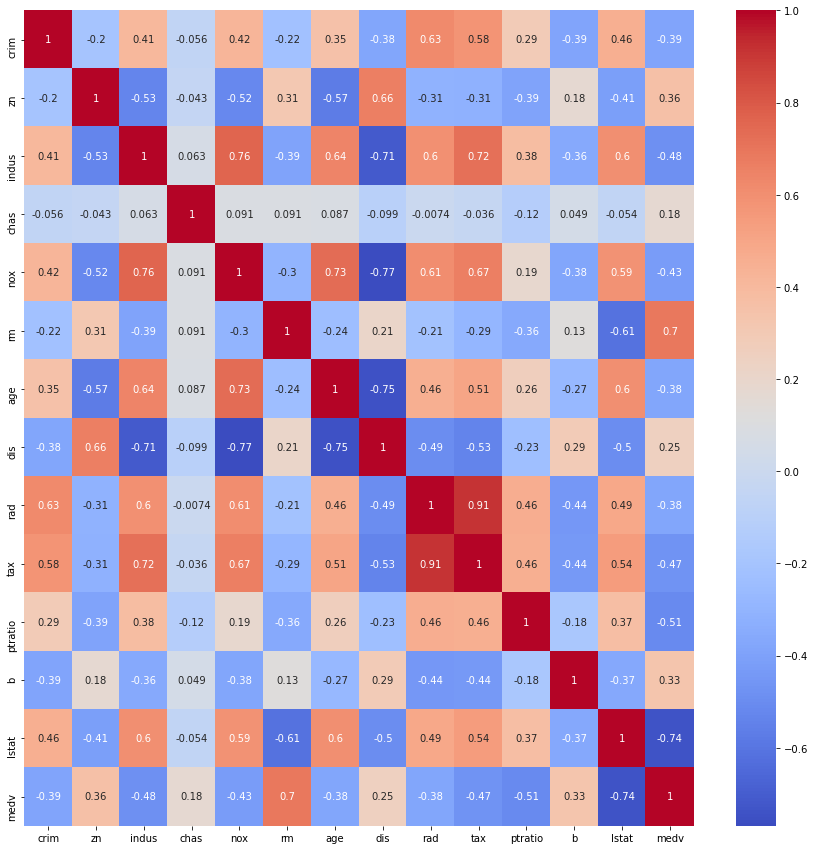

In [14]:
#numerical correlation
Correlation=data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(Correlation,annot=True,cmap='coolwarm')

#### from heatmap we can see tax and rad are very highly correlated with each other so we can drop any of them.

### Lets Split Data into Target and Predictors

In [15]:
target=data['medv']
target.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

In [16]:
predictors=data.drop(columns=['medv','rad'],axis=1)
predictors.head()

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,b,lstat
0,-0.419782,0.284830,2.31,0,0.538,6.575,65.2,4.0900,-0.666608,15.3,0.441052,4.98
1,-0.417339,-0.487722,7.07,0,0.469,6.421,78.9,4.9671,-0.987329,17.8,0.441052,9.14
2,-0.417342,-0.487722,7.07,0,0.469,7.185,61.1,4.9671,-0.987329,17.8,0.396427,4.03
3,-0.416750,-0.487722,2.18,0,0.458,6.998,45.8,6.0622,-1.106115,18.7,0.416163,2.94
4,-0.412482,-0.487722,2.18,0,0.458,7.147,54.2,6.0622,-1.106115,18.7,0.441052,5.33


### Train Test Split

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(predictors,target, test_size=0.3, random_state=70)

In [18]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)
print("Response Rate in Training Data",y_train.mean())
print("Response Rate in Testing Data",y_test.mean())

Shape of Training Data (354, 12)
Shape of Testing Data (152, 12)
Response Rate in Training Data 22.390112994350268
Response Rate in Testing Data 22.86513157894737


### Defining Training and Cross-Validation(k-Fold) Function 

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
def train(model,X,Y):
    #fitting the model
    model.fit(X_train,y_train)
    #predict the test set
    y_pred=model.predict(X_test)
    #Perform Cross-Validation
    cv_score=cross_val_score(model,X,Y,scoring='neg_mean_squared_error',cv=5)
    cv_score=np.abs(np.mean(cv_score))
    
    print("Model Report=")
    print("MSE=",mean_squared_error(y_test,y_pred))
    print("CV_score=",cv_score)
    

## Fitting the Regression model

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
train(model,predictors,target)
coef=pd.Series(model.coef_,predictors.columns).sort_values()
coef.plot(kind='bar',title='Model Coefficients')

In [21]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model,predictors,target)
coef=pd.Series(model.feature_importances_,predictors.columns).sort_values(ascending=False)
coef.plot(kind='bar',title='feature_importance')

In [22]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model,predictors,target)
coef=pd.Series(model.feature_importances_,predictors.columns).sort_values(ascending=False)
coef.plot(kind='bar',title='feature_importance')

Model Report=
MSE= 10.079472421052623
CV_score= 19.56761884360317


<AxesSubplot:title={'center':'feature_importance'}>

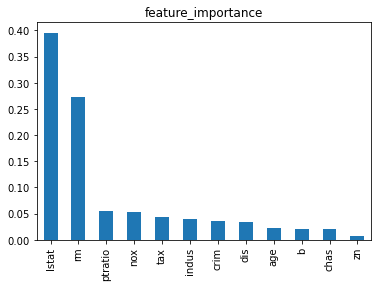

In [27]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model,predictors,target)
coef=pd.Series(model.feature_importances_,predictors.columns).sort_values(ascending=False)
coef.plot(kind='bar',title='feature_importance')

Model Report=
MSE= 9.705905856801843
CV_score= 18.766198044819188


<AxesSubplot:title={'center':'feature_importance'}>

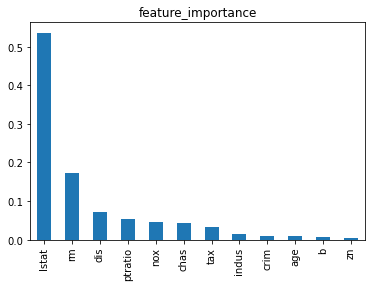

In [24]:
import xgboost as xgb
model = xgb.XGBRegressor()
train(model,predictors,target)
coef=pd.Series(model.feature_importances_,predictors.columns).sort_values(ascending=False)
coef.plot(kind='bar',title='feature_importance')

# Conclusion

#### from various model analysis and reports we can see that XGBRegressor Model giving us most generalized prediction along Mean Square Error equal to 9.70 and Cross Validation Score as 18.76

# Saving a Pickel file for Deployment

In [25]:
import pickle

In [26]:
with open ('Bostan_model_pickle','wb')as f:
    pickle.dump(model,f)